Importing packages

In [25]:
# %matplotlib
import numpy as np
import matplotlib.pyplot as plt
from specutils import Spectrum1D
from specutils.fitting import fit_generic_continuum
from astropy.modeling import models
from astropy import units as u
from scipy.interpolate import CubicSpline, interp1d
import os

os.getcwd()

'c:\\Users\\Pablo\\OneDrive - Universidad de La Laguna\\Master\\Cuatri1\\AtmosferasEstelares\\CosasDuranteCurso\\Entregables\\_github\\1_SpectralClassification\\notebooks'

## Star problem 1 data

Plotting the star problem 1 spectrum

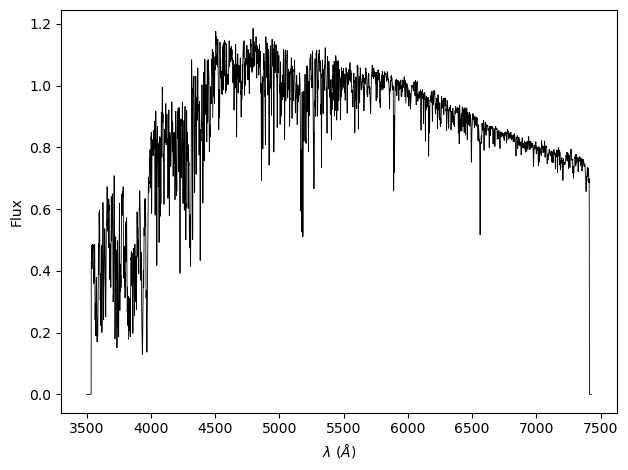

In [26]:
# Loading data of the spectrum
data=np.genfromtxt('../data/starprob1.dat',
                    dtype=float)
x=data[:,0]
y=data[:,1]

# Plotting
plt.plot(x, y, 'k', linewidth=0.6)
plt.xlabel('$\lambda$ ($\AA$)')
plt.ylabel('Flux')
plt.tight_layout()
# plt.savefig('../results/starprob1/starprob1_1_SpectrumRaw')
plt.show()

Plotting star problem 1 spectrum in the region of interest

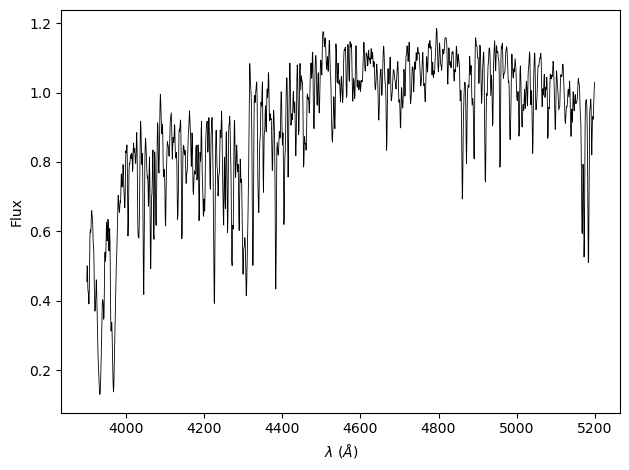

In [ ]:
min_value_full=3900
max_value_full=5200
x_full = x[np.where((x >= min_value_full)&(x <= max_value_full))]
y_full = y[np.where((x >= min_value_full)&(x <= max_value_full))]

plt.plot(x_full,y_full, c='k', linewidth=0.6)
plt.xlabel('$\lambda$ ($\t{\AA}$)')
plt.ylabel('Flux')
plt.tight_layout()
# plt.savefig('../results/starprob1/starprob1_2_SpectrumRanged')
plt.show()

## Normalization of the spectrum

Obtaining the continuum envelope

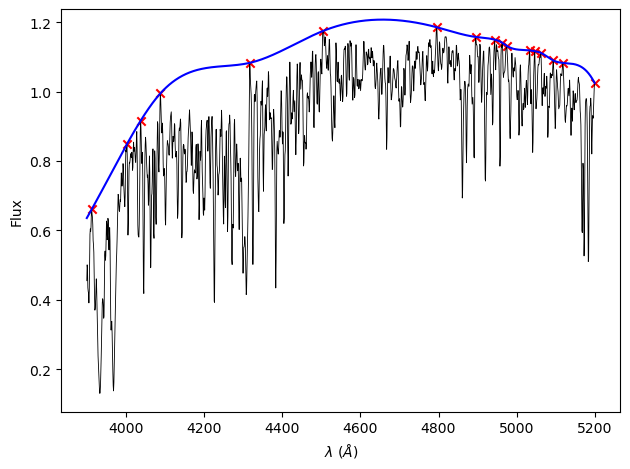

In [ ]:
# cont_onda= (3901, 3913, 4003, 4038, 4088.7, 4317.17, 4504.9, 4795.3, 4894.9, 4943.5, 4963.5, 4974.08, 5033, 5046.02, 5061.03, 5093, 5118.14, 5199)
cont_onda= (3544, 3597, 3659, 3714, 3784, 3810, 3892, 3913, 4003, 4038, 4088.7, 4317.17, 4504.9, 4795.3, 4894.9, 4943.5, 4963.5, 4974.08, 5033, 5046.02, 5061.03, 5093, 5118.14, 5199)
# To ensure sure that points are within the range of interest
cont_onda = [wave for wave in cont_onda if min(x_full) <= wave <= max(x_full)]

# Continuum fitting with a cubic spline using the original wavelengths
cs = CubicSpline(x_full, y_full)
# Evaluation of the spline at the points to calculate the actual flux values
cont_flux = cs(cont_onda)
# Cubic 1D interpolation to obtain spectrum envelope
interp_func = interp1d(cont_onda, cont_flux, kind='cubic', fill_value='extrapolate')
cont_flux_interp = interp_func(x_full)

# Plotting
plt.plot(x_full, y_full, c='k', linewidth=0.6)
plt.xlabel('$\lambda$ ($\t{\AA}$)')
plt.ylabel('Flux')
plt.tight_layout()
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.plot(x_full, cont_flux_interp, color = 'b')
plt.scatter(cont_onda, cont_flux, marker='x', c='red')
# plt.plot(cont_onda, cont_flux, c='r')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.tight_layout()
# plt.savefig('../results/starprob1/starprob1_3_ContinuumEnvelope')
plt.show()

Normalization

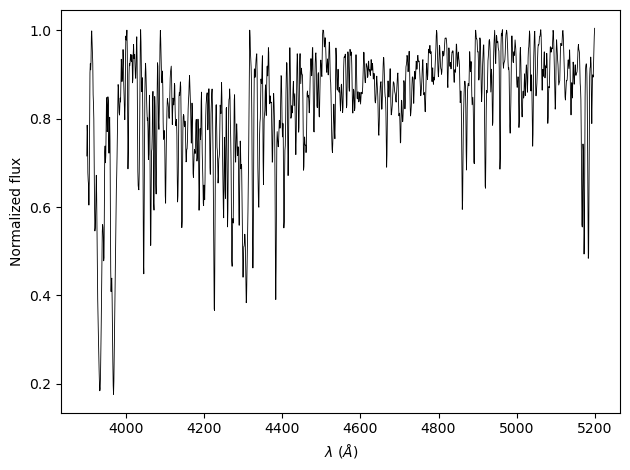

In [ ]:
# Normalización dividiendo los datos reales entre la envolvente
normalized_spectrum=y_full/cont_flux_interp

# Plotting
plt.plot(x_full, normalized_spectrum, c='k', linewidth=0.6)
plt.xlabel('$\lambda$ ($\AA$)')
plt.ylabel('Normalized flux')
plt.tight_layout()
# plt.savefig('../results/starprob1/starprob1_4_NormalizedSpectrum')
plt.show()

Showing some spectral lines

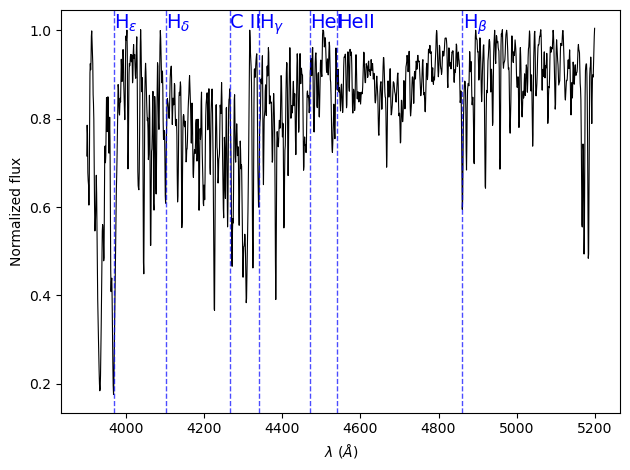

In [ ]:
# Espectro en rango de los de referencia y normalizado
plt.plot(x_full, normalized_spectrum, c='k', linewidth=0.8)
# Spectral lines
lines_spectral = np.array([3970, 4102, 4341, 4861, 4471, 4541, 4267])
lines_spectral_names = [r'H$_{\epsilon}$', r'H$_{\delta}$', r'H$_{\gamma}$', r'H$_{\beta}$', 'HeI', 'HeII','C II']
for i in range(0, np.size(lines_spectral)): 
        # plt.axvline(lines_spectral[i], 0, 1, ls = '--', color = 'dimgrey', alpha = 0.7)
        plt.axvline(lines_spectral[i], 0, 1, ls = '--', color = 'b', alpha = 0.7, linewidth=1)
        plt.text(lines_spectral[i] + 0.5, max(normalized_spectrum), lines_spectral_names[i], fontsize = 14, c='b')
plt.xlabel('$\lambda$ ($\t{\AA}$)')
plt.ylabel('Normalized flux')
plt.tight_layout()
# plt.savefig('../results/starprob1/starprob1_5_SpectralLines')
plt.show()

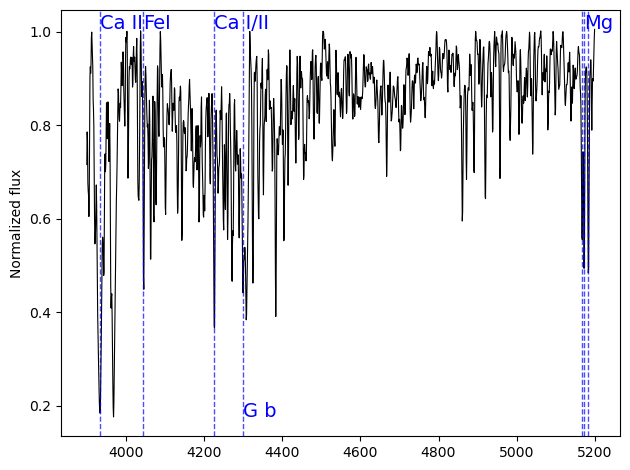

In [ ]:
lines_spectral = np.array([3934, 4045 , 4226, 4300,5167, 5172, 5183])
lines_spectral_names = ['Ca II', 'FeI', 'Ca I/II','G b','','Mg','']

# Espectro en rango de los de referencia y normalizado
plt.plot(x_full, normalized_spectrum, c='k', linewidth=0.8)
for i in range(0, np.size(lines_spectral)): 
        if lines_spectral[i] == 4300:
                plt.axvline(lines_spectral[i], 0, 1, ls = '--', color = 'b', alpha = 0.7, linewidth=1)
                plt.text(lines_spectral[i] + 0.5, min(normalized_spectrum), lines_spectral_names[i], fontsize = 14, c='b')
        else:
                plt.axvline(lines_spectral[i], 0, 1, ls = '--', color = 'b', alpha = 0.7, linewidth=1)
                plt.text(lines_spectral[i] + 0.5, max(normalized_spectrum), lines_spectral_names[i], fontsize = 14, c='b')
plt.ylabel('Normalized flux')
plt.tight_layout()
# plt.savefig('../results/starprob1/starprob1_5_SpectralLines_extra')
plt.show()

Comparing with reference spectrum

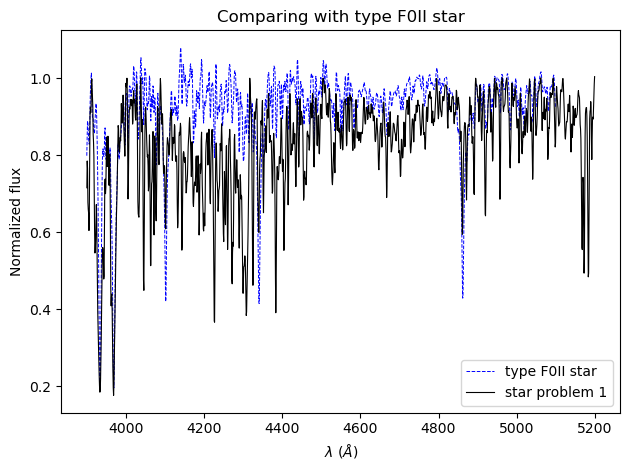

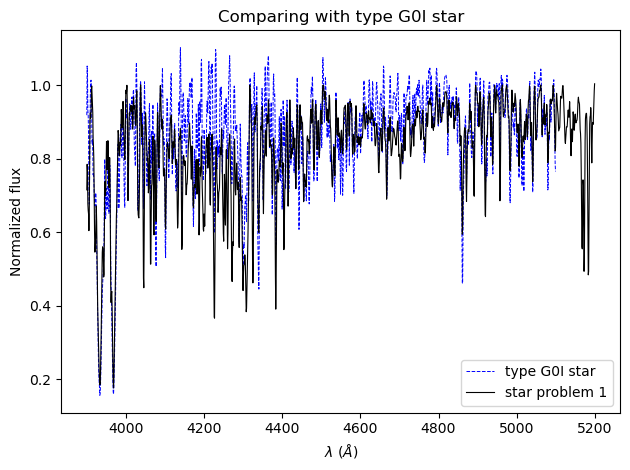

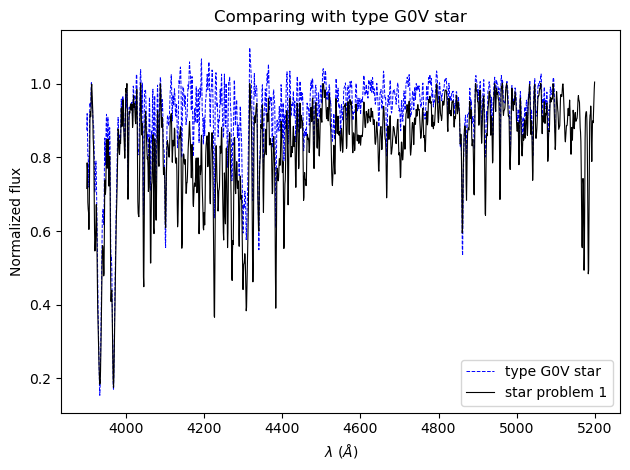

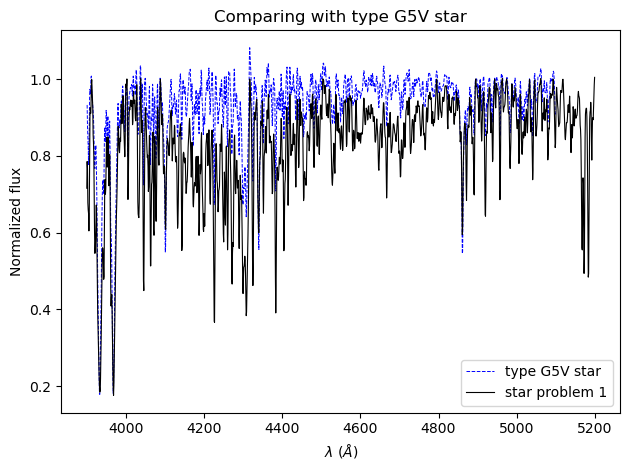

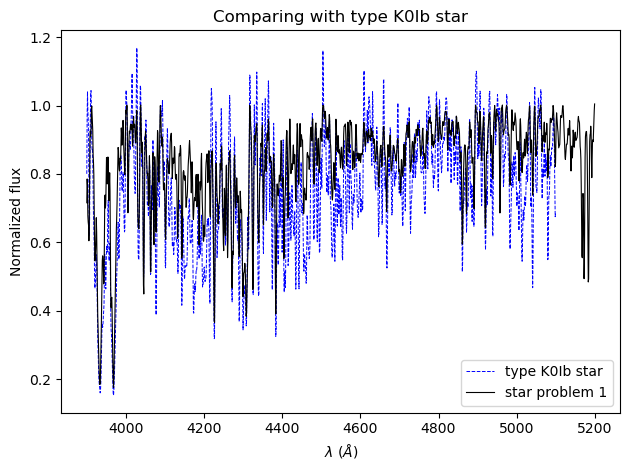

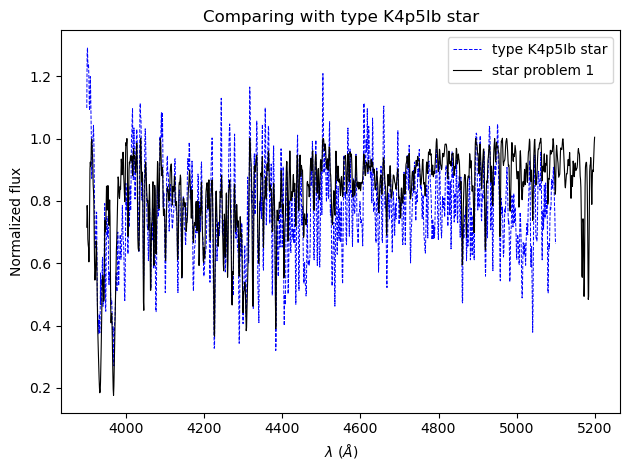

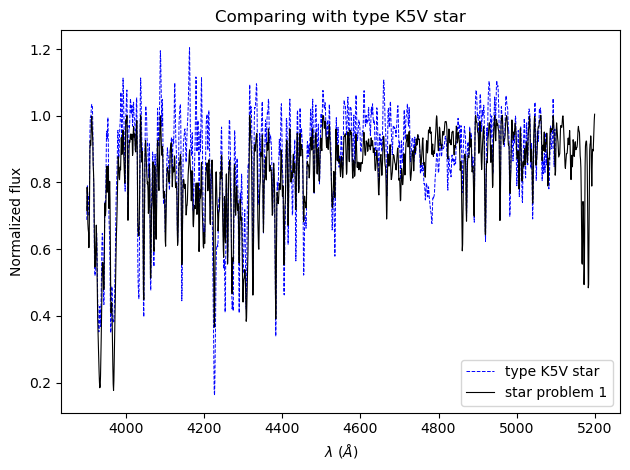

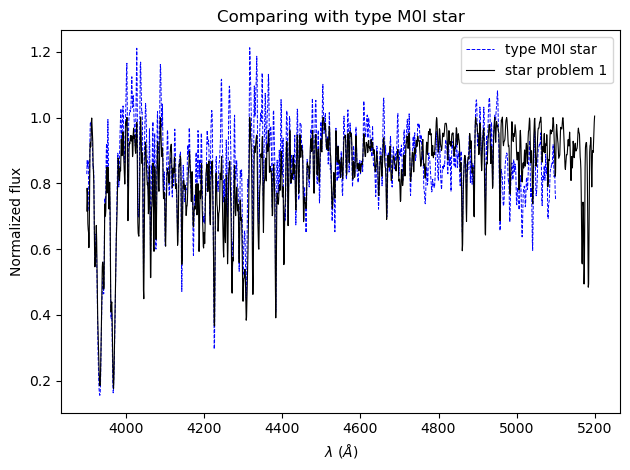

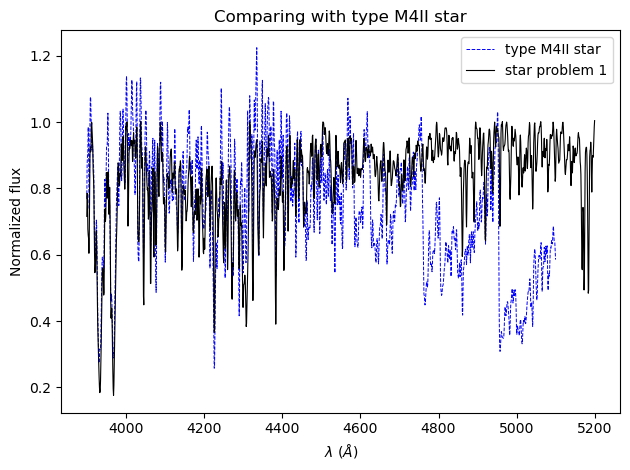

In [ ]:
# Loading reference spectra
spectra_dir = '../data/espectros_referencia/'
names_dir = ['HD37227_F0II.dat', 'HD16901_G0I.dat', 'HD141004_G0V.dat', 'HD20630_G5V.dat', 'HD12014_K0Ib.dat', 'HD219978_K4p5Ib.dat',\
             'HD201091_K5V.dat', 'HD132933_M0I.dat', 'HD175588_M4II.dat']
names = [x.split('_')[1].split('.')[0] for x in names_dir]

# Plotting
for x in range(len(names)):#len(names)
    data = np.genfromtxt(spectra_dir+names_dir[x])
    xx = data[:, 0]
    yy = data[:, 1]
    plt.plot(xx, yy, '--b', linewidth=0.7, label='type '+names[x]+' star')
    plt.plot(x_full, normalized_spectrum, c='k', linewidth=0.8, label='star problem 1')
    plt.xlabel('$\lambda$ ($\AA$)')
    plt.ylabel('Normalized flux')
    plt.title('Comparing with type '+names[x]+' star')
    plt.legend()
    plt.tight_layout()
    # plt.savefig('../results/starprob1/starprob1_6_Comparing'+names[x])
    plt.show()